homography:
 [[ 4.56254443e-01  1.37547295e+00 -7.60589575e+02]
 [-1.10238419e+00  8.72591430e-01  9.73340029e+02]
 [ 4.29753090e-06  4.05165720e-04  1.00000000e+00]]


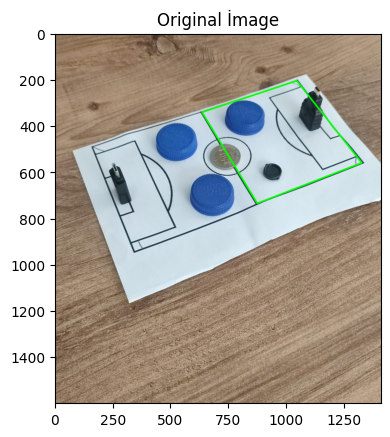

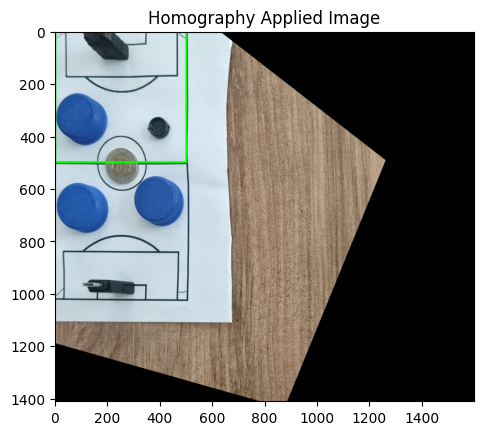

True

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
image_path = '21.jpeg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imwrite("gray.jpeg",gray)
# Detect edges using Canny
canny = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imwrite("canny.jpeg",canny)
# Find the contours
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# En büyük konturu buluyoruz (varsayılan olarak futbol sahası en büyük kontur olmalı)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]



# En dış köşeleri bulmak için kontur üzerinde bir dörtgen yaklaştırması yapıyoruz
epsilon = 0.08 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)

# We expect to find 4 corners for the soccer field
if len(approx) == 4:
    # Draw the detected corners on the image
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 5)

    # Define the destination points for the homography (the expected positions of the corners in the output image)
    # The order of points in the destination should match the order of the points found in the input image

    dst_points = np.float32([[0, 0], [0, 500], [500, 500], [500, 0]])

    # Determine the source points from the contour approximation
    src_points = np.float32([point[0] for point in approx])

    # Compute the homography matrix
    H, _ = cv2.findHomography(src_points, dst_points)

    # Apply the homography transformation to warp the image to a top-down view
    h, w, c = image.shape
    warped = cv2.warpPerspective(image, H, (h, w))
    print("homography:\n",H)

else:
    raise ValueError("Did not find 4 corners.")

# Save the original image with detected corners and the warped image

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original İmage')
plt.show()

plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title('Homography Applied Image')
plt.show()
cv2.imwrite("warped 1.jpeg",warped)



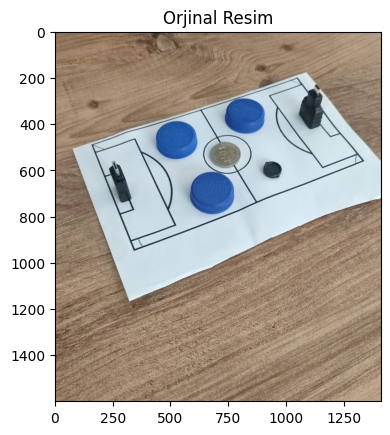

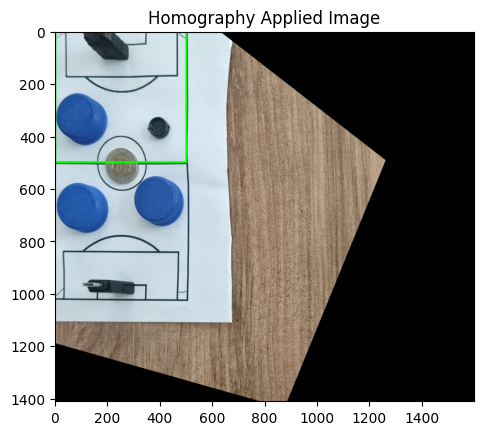

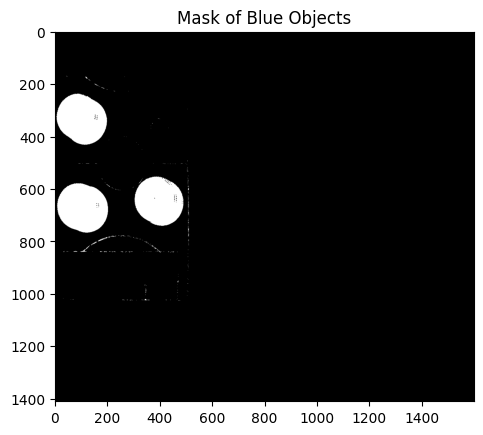

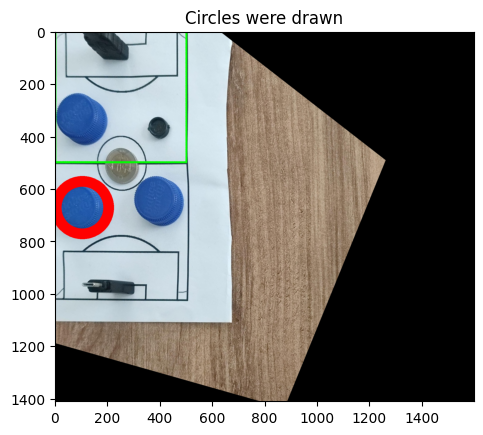

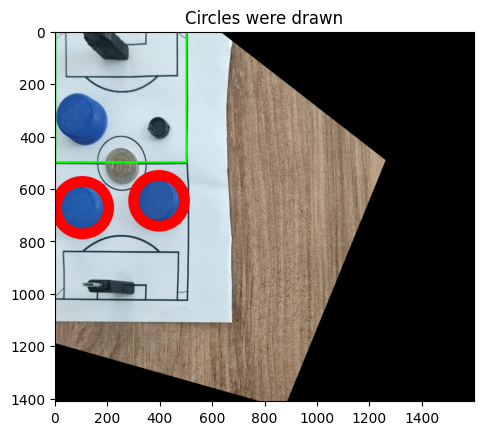

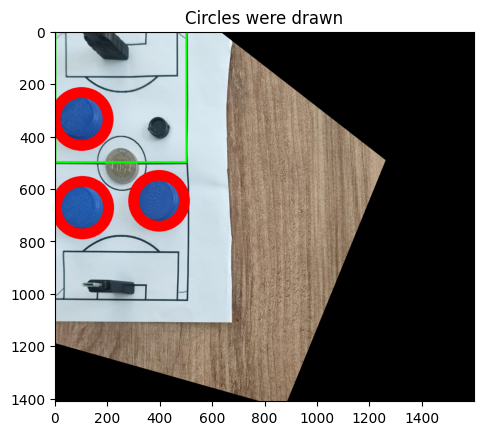

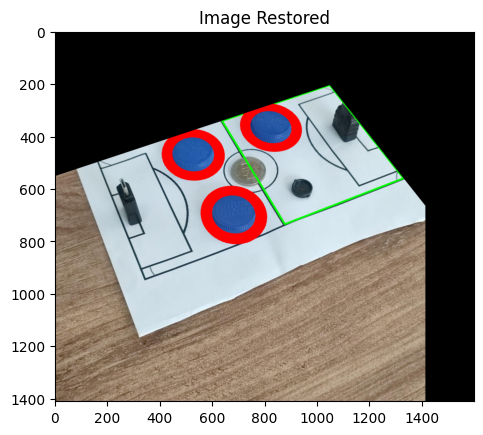

True

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Resmi yükleyelim
image_path = '21.jpeg'
image = cv2.imread(image_path)
image_corner_detect = image
detect_4_point = True
# Resmi gösterelim
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orjinal Resim')
plt.show()

gray = cv2.cvtColor(image_corner_detect, cv2.COLOR_BGR2GRAY)

#cv2.imwrite("gray.jpeg",gray)
# Detect edges using Canny
canny = cv2.Canny(gray, 50, 150, apertureSize=3)
#cv2.imwrite("canny.jpeg",canny)
# Find the contours
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# We find the largest contour (by default the football field should be the largest contour)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
h, w, c = image.shape
# We perform a quadrilateral approximation on the contour to find the outermost corners
epsilon = 0.08 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)
dst_points
src_points
if len(approx) == 4:
    # Draw the detected corners on the image
    cv2.drawContours(image_corner_detect, [approx], 0, (0, 255, 0), 5)

    # Define the destination points for the homography (the expected positions of the corners in the output image)
    # The order of points in the destination should match the order of the points found in the input image
    dst_points = np.float32([[0, 0], [0, 500], [500, 500], [500, 0]])

    # Determine the source points from the contour approximation
    src_points = np.float32([point[0] for point in approx])

    # Compute the homography matrix

    H, _ = cv2.findHomography(src_points, dst_points)

    # Apply the homography transformation to warp the image to a top-down view


    image_corner_detect = cv2.warpPerspective(image_corner_detect, H, (h, w))

    plt.imshow(cv2.cvtColor(image_corner_detect, cv2.COLOR_BGR2RGB))
    plt.title('Homography Applied Image')
    plt.show()

else:
    print("4 points were not found, therefore homography could not be applied\n")
    detect_4_point = False

# Let's define the HSV color range of the color blue

lower_blue = np.array([100,150,50])
upper_blue = np.array([140,255,255])


# Let's convert the image to HSV color space
hsv = cv2.cvtColor(image_corner_detect, cv2.COLOR_BGR2HSV)

# Let's create a mask of only the blue objects
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Let's show the results of the mask
plt.imshow(mask, cmap='gray')
plt.title('Mask of Blue Objects')
plt.show()

# Let's find the contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)




# Let's draw a filled circle under the image for each contour.
for cnt in contours:
    # Let's find the center and radius of the contour
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)

    # Let's only consider sufficiently large objects
    if radius >  70 :
        # Let's adjust the radius to be under the object.
        #bottom_center = (int(x), int(y) + radius)
        # Calculate the coordinates of the cutting area

        cv2.circle(image_corner_detect, center, radius, (0, 0, 255), 40)
        plt.imshow(cv2.cvtColor(image_corner_detect, cv2.COLOR_BGR2RGB))
        plt.title('Circles were drawn')
        plt.show()


# Let's show the results
if(detect_4_point == True) :
  inverse_homography_matrix = cv2.getPerspectiveTransform(dst_points, src_points)
  image_corner_detect = cv2.warpPerspective(image_corner_detect, inverse_homography_matrix, (h, w))

plt.imshow(cv2.cvtColor(image_corner_detect, cv2.COLOR_BGR2RGB))
plt.title('Image Restored')
plt.show()
cv2.imwrite("Restored_ımage.jpeg",image_corner_detect)
